In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [4]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [8]:
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

In [9]:
label_counts = df['Income'].value_counts()
print("Label Category Counts:")
print(label_counts)

Label Category Counts:
 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


In [10]:
feature_to_analyze = 'Age'
print("Descriptive Statistics:")
print(df[feature_to_analyze].describe())

Descriptive Statistics:
count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64


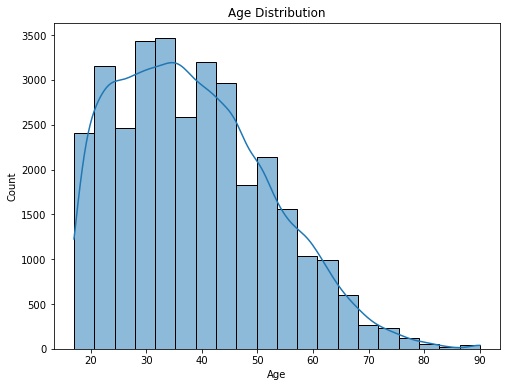

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=feature_to_analyze, bins=20, kde=True)
plt.title(f'{feature_to_analyze} Distribution')
plt.xlabel(feature_to_analyze)
plt.ylabel('Count')
plt.show()

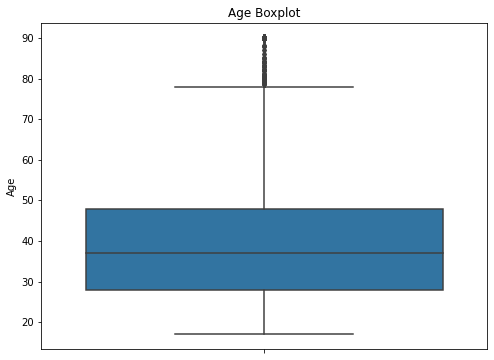

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y=feature_to_analyze)
plt.title(f'{feature_to_analyze} Boxplot')
plt.ylabel(feature_to_analyze)
plt.show()

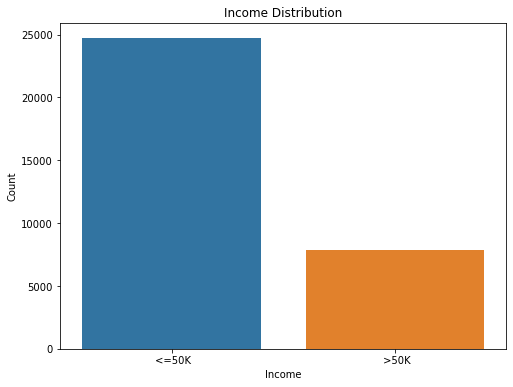

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

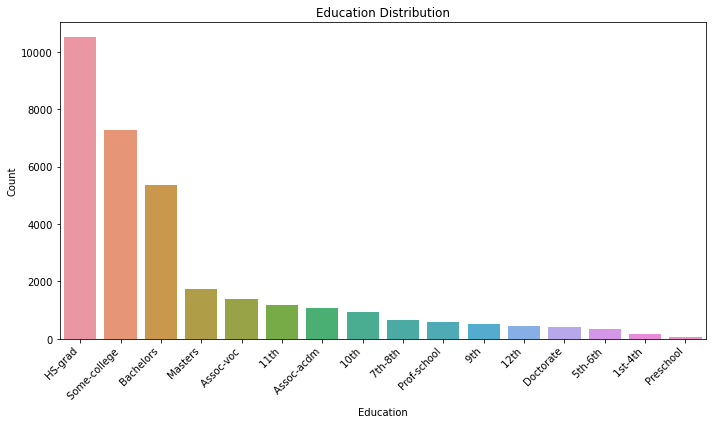

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

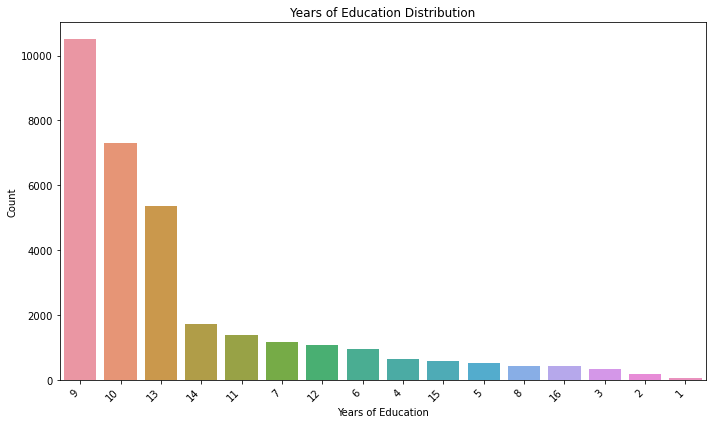

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education_num', order=df['Education_num'].value_counts().index)
plt.title('Years of Education Distribution')
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

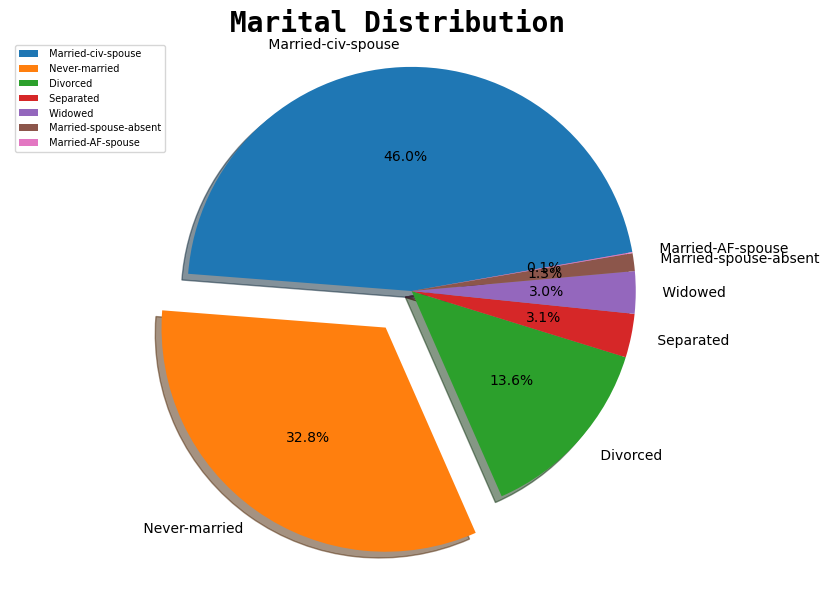

In [16]:
marital = df['Marital_status'].value_counts()

plt.style.use('default')

plt.figure(figsize=(10, 7))

plt.pie(marital.values, labels=marital.index, startangle=10, explode=(0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')

plt.title('Marital Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()


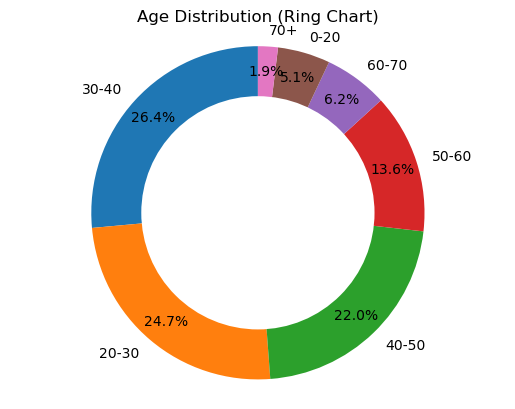

In [17]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 120]  # Customize the bins as needed
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

df['Age_Binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = df['Age_Binned'].value_counts()

fig, ax = plt.subplots()
ax.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.title('Age Distribution (Ring Chart)')

ax.axis('equal')

plt.show()

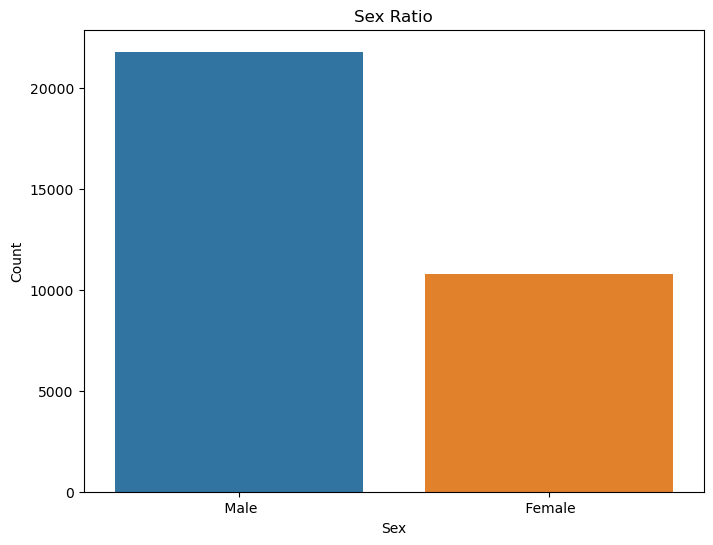

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex')
plt.title('Sex Ratio')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [19]:
import plotly.express as px
race_counts = df['Race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

fig = px.treemap(race_counts, path=['Race'], values='Count', title='Race Distribution')
fig.show()

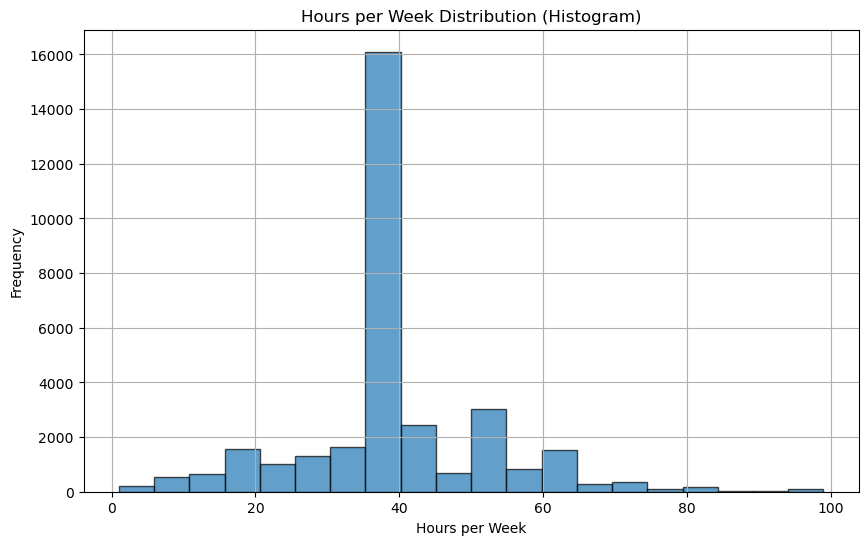

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Hours_per_week'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Hours per Week Distribution (Histogram)')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

 Bivariate Analysis

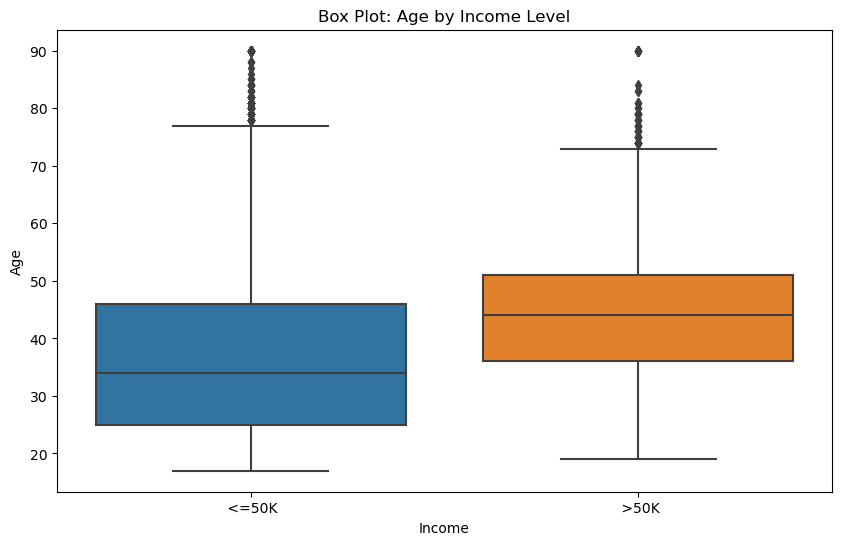

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Income', y='Age')
plt.title('Box Plot: Age by Income Level')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

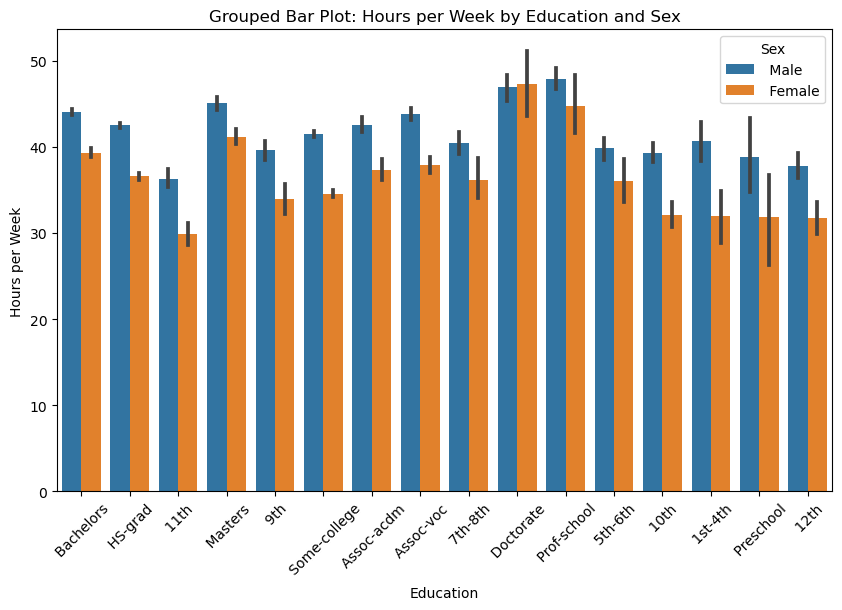

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Education', y='Hours_per_week', hue='Sex')
plt.title('Grouped Bar Plot: Hours per Week by Education and Sex')
plt.xlabel('Education')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)
plt.show()

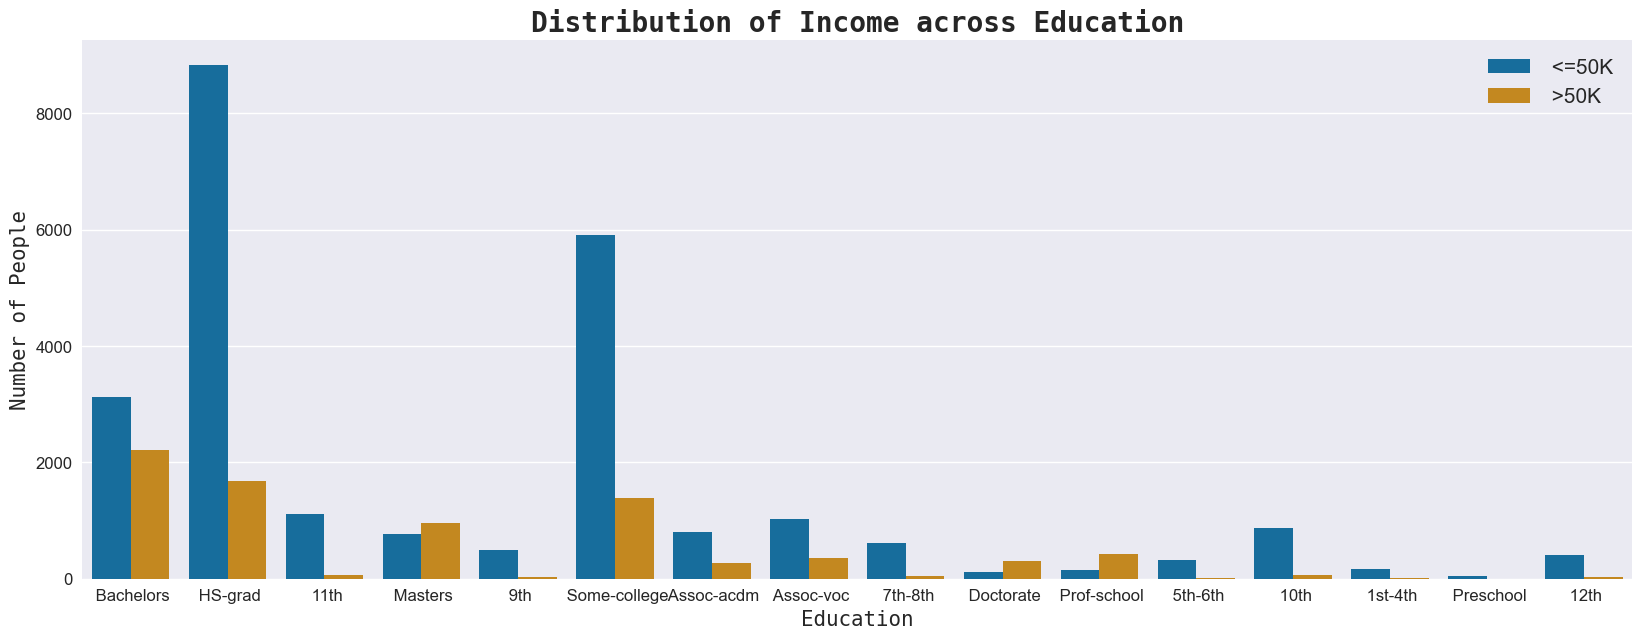

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='Education', hue='Income', palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

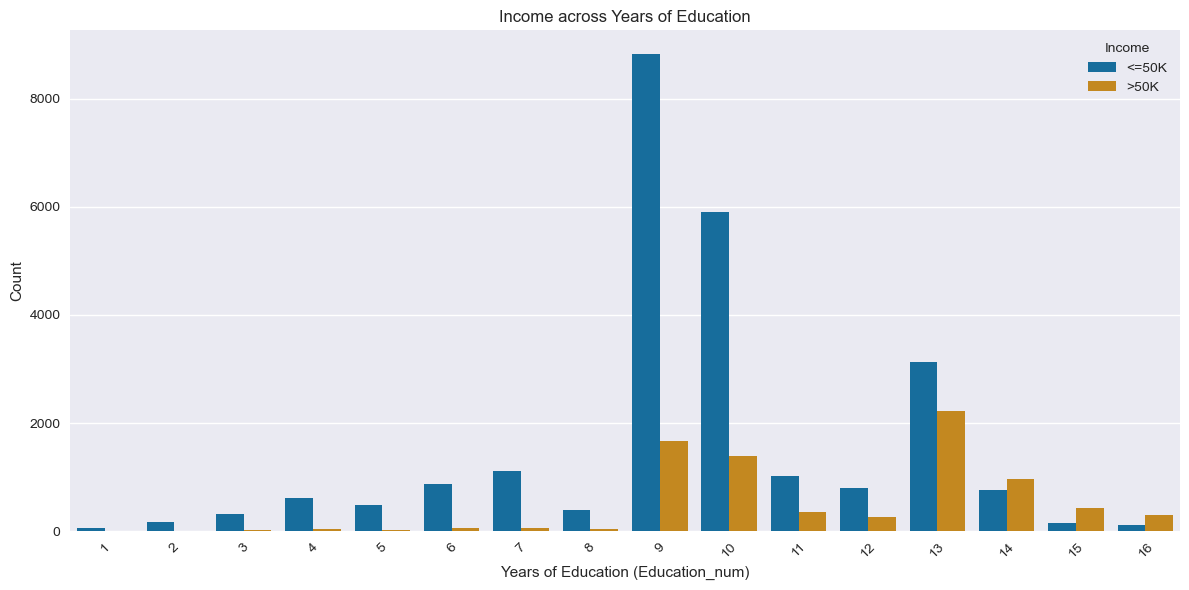

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Education_num', hue='Income', palette='colorblind')
plt.title('Income across Years of Education')
plt.xlabel('Years of Education (Education_num)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()

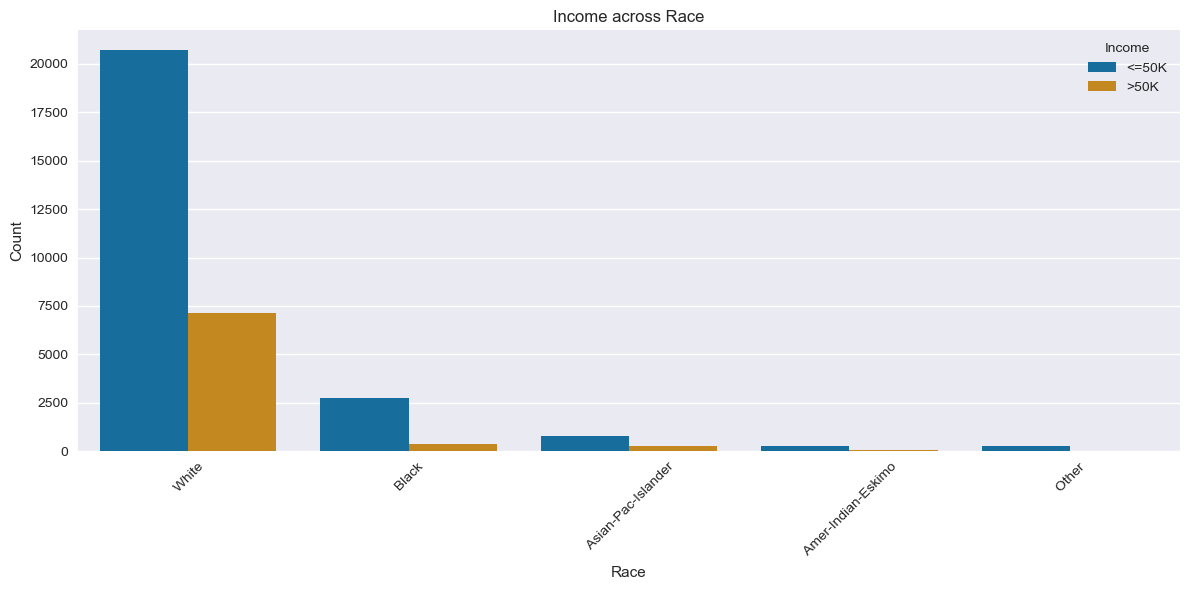

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Race', hue='Income', palette='colorblind')
plt.title('Income across Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()

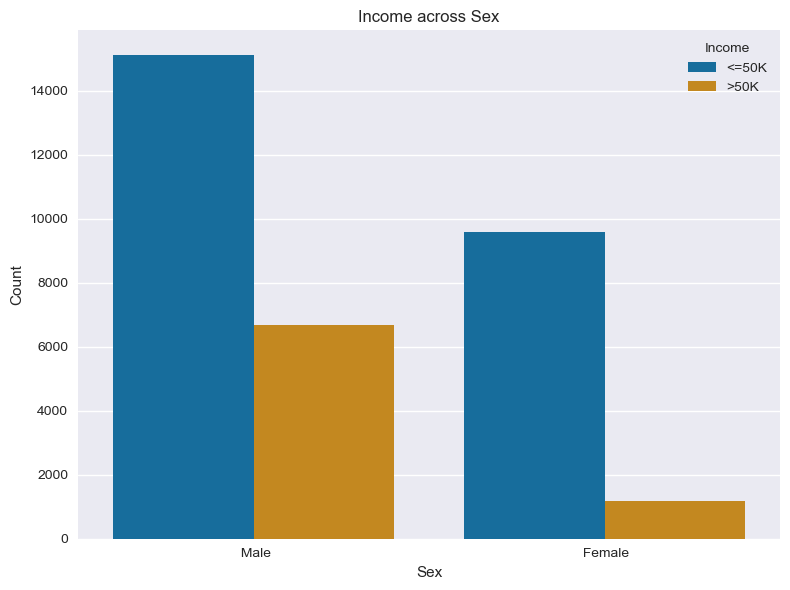

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Income', palette='colorblind')
plt.title('Income across Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()

Multivariate Analysis

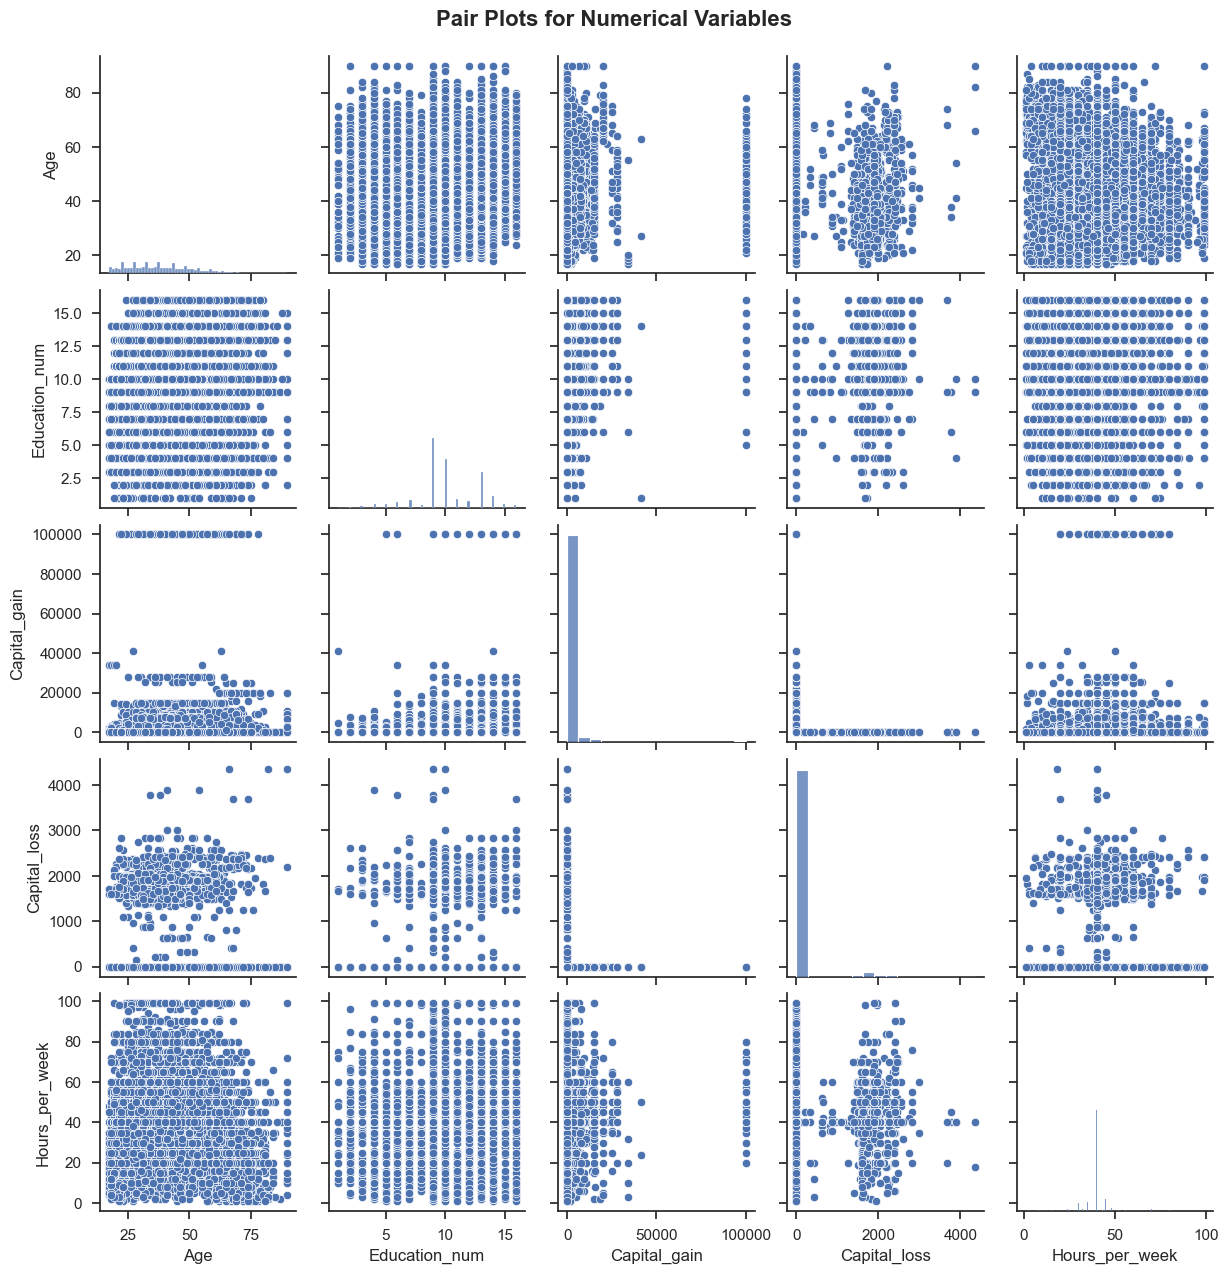

In [27]:
numerical_variables = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

sns.set(style="ticks")
sns.pairplot(data=df, vars=numerical_variables)
plt.suptitle("Pair Plots for Numerical Variables", y=1.02, fontsize=16, fontweight='bold')
plt.show()

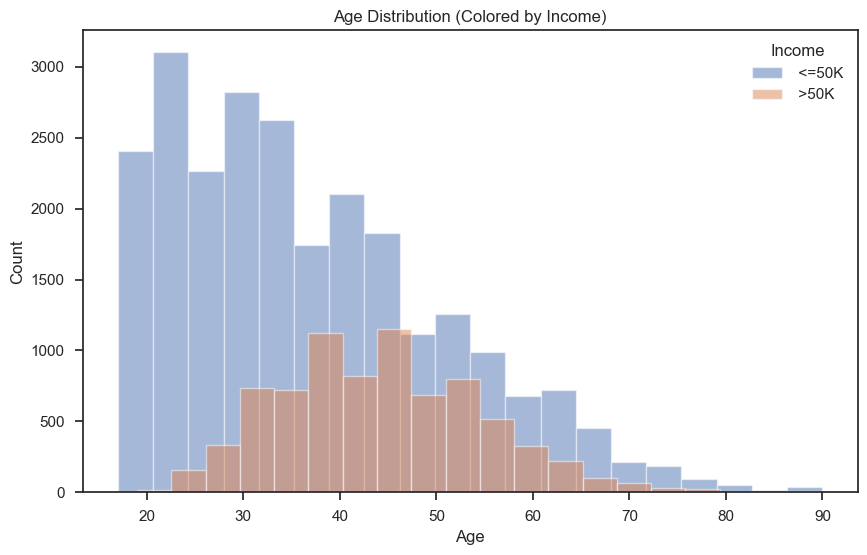

In [28]:
income_groups = df.groupby('Income')

plt.figure(figsize=(10, 6))
for income, group in income_groups:
    plt.hist(group['Age'], bins=20, alpha=0.5, label=income)

plt.title('Age Distribution (Colored by Income)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

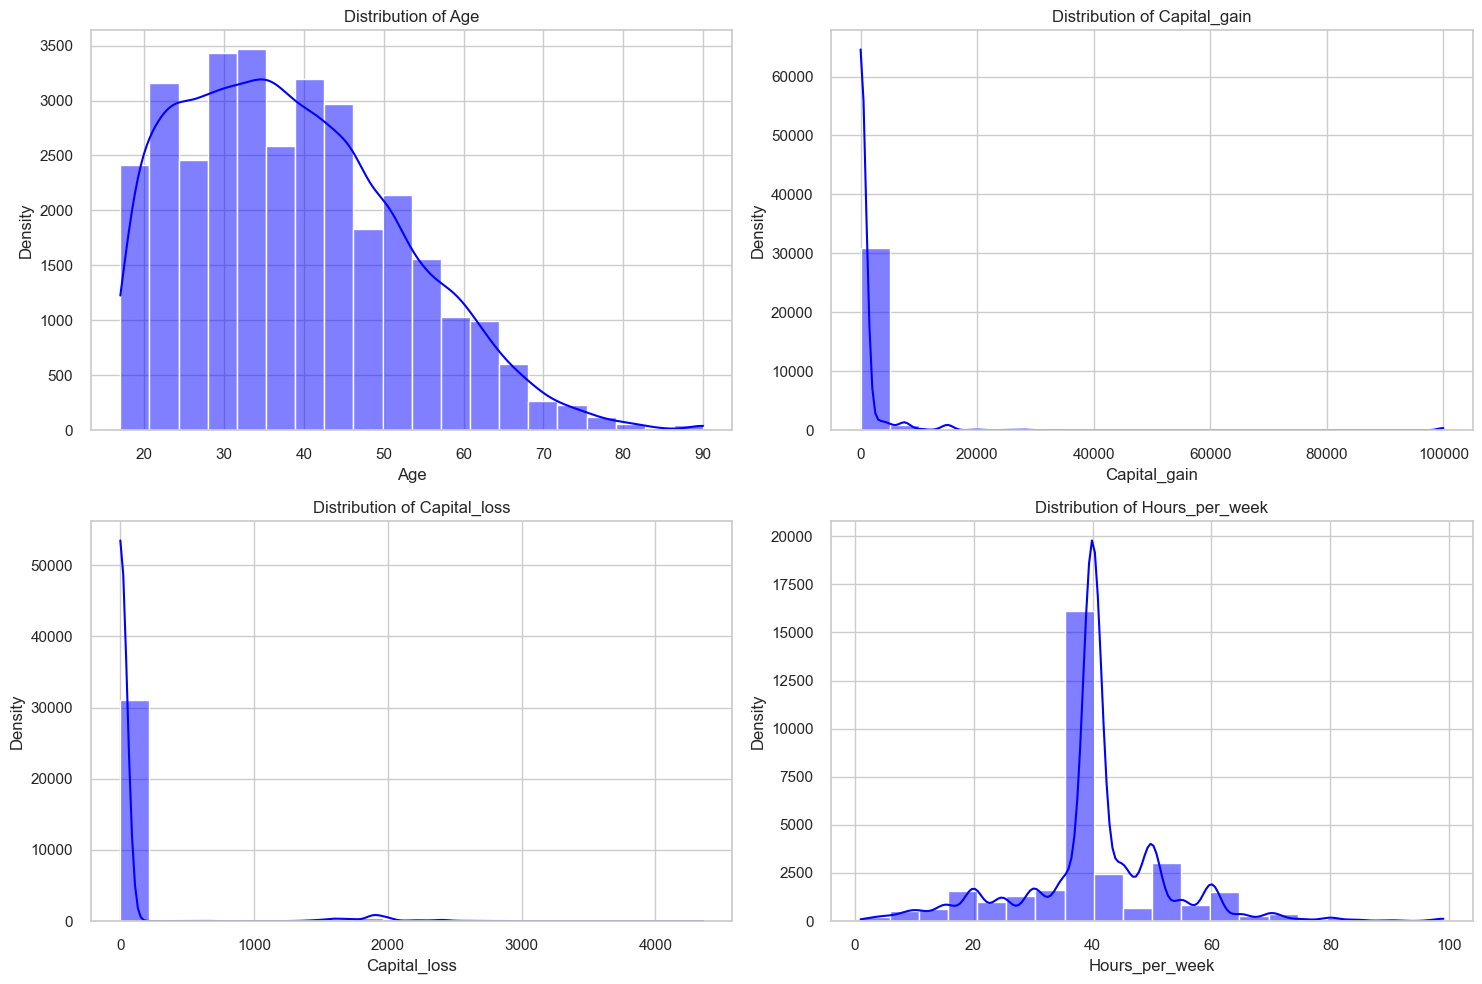

In [29]:
continuous_columns = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

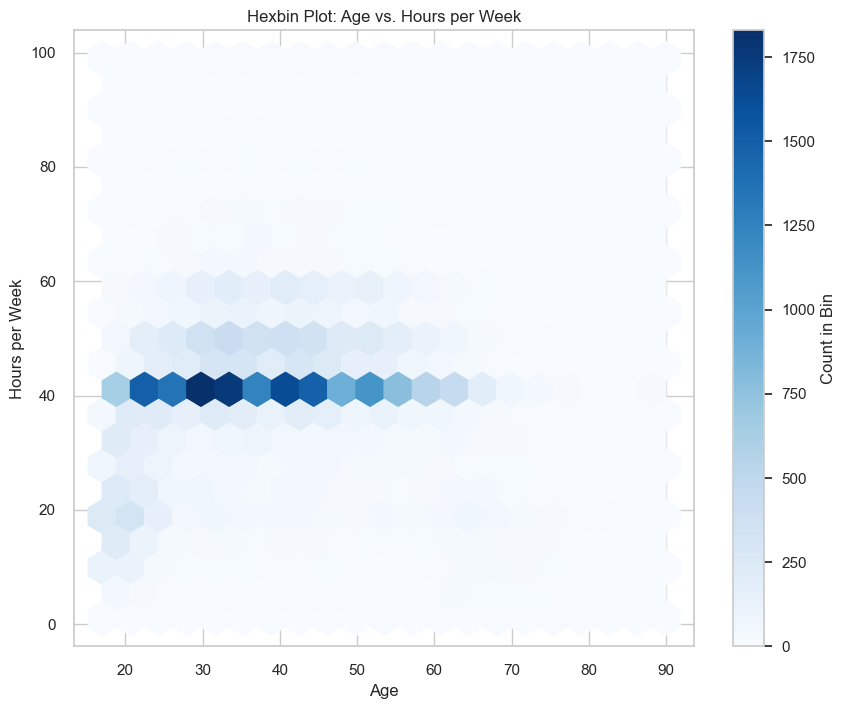

In [30]:
plt.figure(figsize=(10, 8))
hb = plt.hexbin(df['Age'], df['Hours_per_week'], gridsize=20, cmap='Blues')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Hexbin Plot: Age vs. Hours per Week')
plt.colorbar(hb, label='Count in Bin')
plt.show()

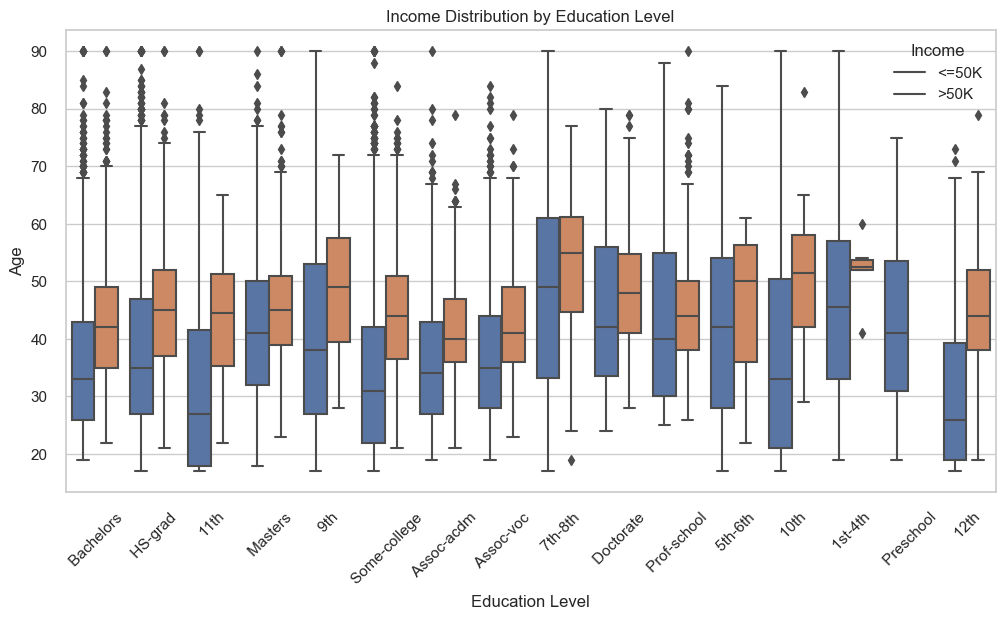

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Education', y='Age', hue='Income')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45)
plt.show()

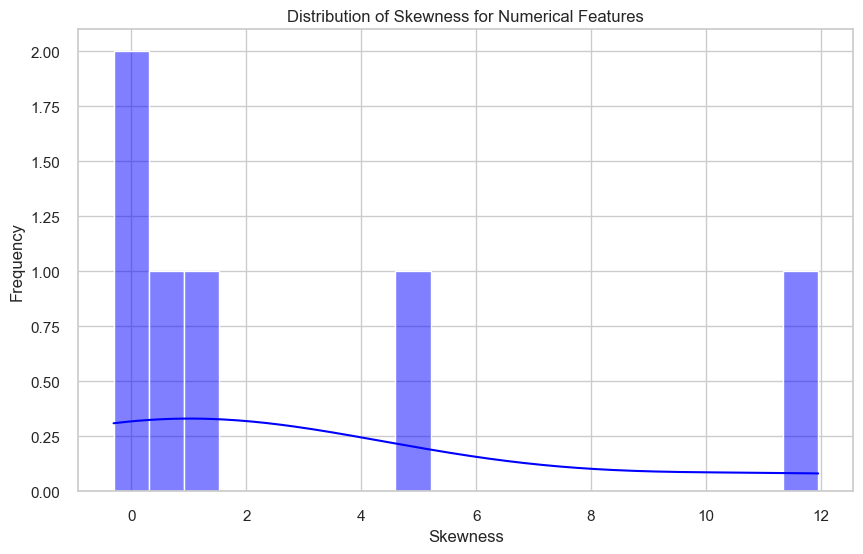

In [32]:
numerical_columns = df.select_dtypes(include=[np.number])
skewness = numerical_columns.apply(lambda x: x.skew())

plt.figure(figsize=(10, 6))
sns.histplot(skewness, bins=20, kde=True, color='blue')
plt.title("Distribution of Skewness for Numerical Features")
plt.xlabel("Skewness")
plt.ylabel("Frequency")
plt.show()

In [33]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])

In [34]:
correlation =df.corr()
correlation

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.003786 -0.076646  -0.010508       0.036527   
Workclass       0.003786   1.000000 -0.016587   0.023537       0.052015   
Fnlwgt         -0.076646  -0.016587  1.000000  -0.028156      -0.043159   
Education      -0.010508   0.023537 -0.028156   1.000000       0.359172   
Education_num   0.036527   0.052015 -0.043159   0.359172       1.000000   
Marital_status -0.266292  -0.064798  0.028184  -0.038398      -0.069338   
Occupation     -0.020946   0.255004  0.001554  -0.021274       0.109748   
Relationship   -0.263698  -0.090449  0.008922  -0.010879      -0.094145   
Race            0.028718   0.049720 -0.021278   0.014135       0.031825   
Sex             0.088832   0.095942  0.026882  -0.027349       0.012256   
Capital_gain    0.077674   0.033828  0.000437   0.030047       0.122627   
Capital_loss    0.057775   0.012231 -0.010259   0.016744       0.079932   
Hours_per_week  0.068756   0.138974 -0.018770   0.055510       0.148127   
Native_country -0.001151  -0.007710 -0.051957   0.064291       0.050831   
Income          0.234039   0.051645 -0.009481   0.079311       0.335182   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.266292   -0.020946     -0.263698  0.028718  0.088832   
Workclass            -0.064798    0.255004     -0.090449  0.049720  0.095942   
Fnlwgt                0.028184    0.001554      0.008922 -0.021278  0.026882   
Education            -0.038398   -0.021274     -0.010879  0.014135 -0.027349   
Education_num        -0.069338    0.109748     -0.094145  0.031825  0.012256   
Marital_status        1.000000   -0.009617      0.185461 -0.068025 -0.129337   
Occupation           -0.009617    1.000000     -0.075620  0.006779  0.080328   
Relationship          0.185461   -0.075620      1.000000 -0.116052 -0.582453   
Race                 -0.068025    0.006779     -0.116052  1.000000  0.087197   
Sex                  -0.129337    0.080328     -0.582453  0.087197  1.000000   
Capital_gain         -0.043398    0.025511     -0.057918  0.011143  0.048477   
Capital_loss         -0.034182    0.017979     -0.061064  0.018902  0.045572   
Hours_per_week       -0.190521    0.080384     -0.248975  0.041910  0.229312   
Native_country       -0.023827   -0.012532     -0.005504  0.137849 -0.008125   
Income               -0.199295    0.075448     -0.250924  0.071853  0.215995   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.077674      0.057775        0.068756       -0.001151   
Workclass           0.033828      0.012231        0.138974       -0.007710   
Fnlwgt              0.000437     -0.010259       -0.018770       -0.051957   
Education           0.030047      0.016744        0.055510        0.064291   
Education_num       0.122627      0.079932        0.148127        0.050831   
Marital_status     -0.043398     -0.034182       -0.190521       -0.023827   
Occupation          0.025511      0.017979        0.080384       -0.012532   
Relationship       -0.057918     -0.061064       -0.248975       -0.005504   
Race                0.011143      0.018902        0.041910        0.137849   
Sex                 0.048477      0.045572        0.229312       -0.008125   
Capital_gain        1.000000     -0.031614        0.078409       -0.001984   
Capital_loss       -0.031614      1.000000        0.054256        0.000420   
Hours_per_week      0.078409      0.054256        1.000000       -0.002671   
Native_country     -0.001984      0.000420       -0.002671        1.000000   
Income              0.223333      0.150523        0.229690        0.015845   

                  Income  
Age             0.234039  
Workclass       0.051645  
Fnlwgt         -0.009481  
Education       0.079311  
Education_num   0.335182  
Marital_status -0.199295  
Occupation      0.075448  
Relationship   -0.250924  
Race            0.071853  
Sex             0.21

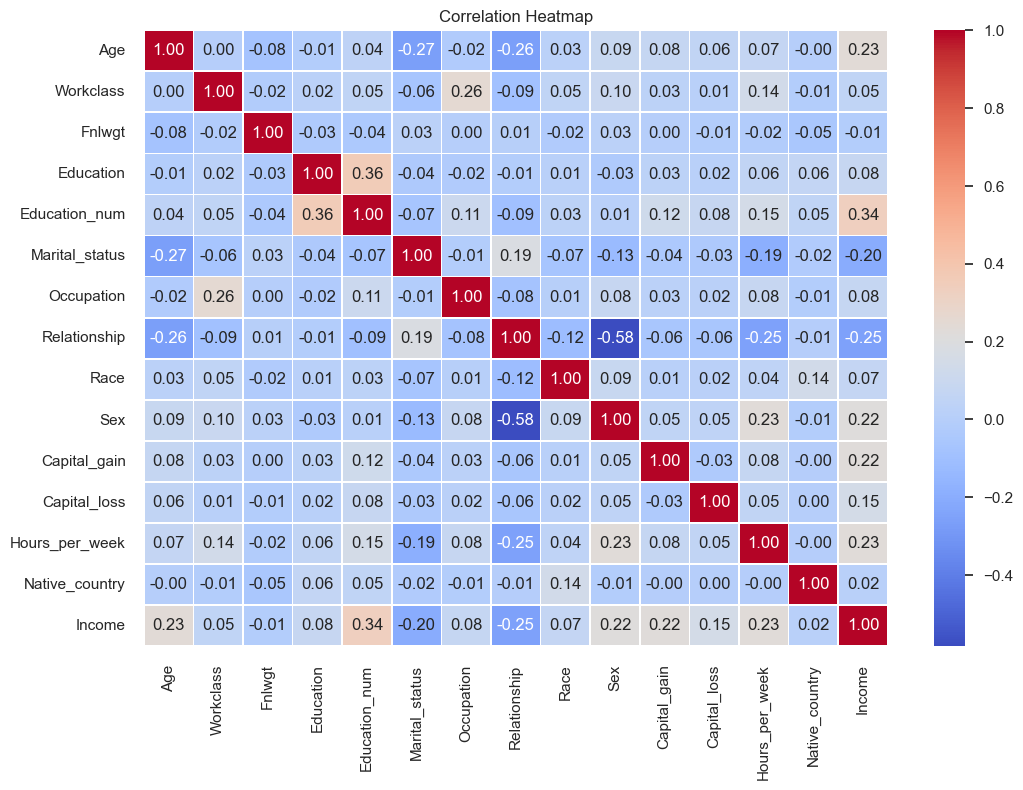

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [36]:
df = df.replace('?', np.nan)

In [37]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
Age_Binned        0.0 %
dtype: object

In [38]:
df.drop('Marital_status',axis=1,inplace=True)
df.drop('Relationship',axis=1,inplace=True)

In [39]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['Age_Binned'], dtype='object')


In [40]:
for column in non_numeric_columns:
    unique_values = df[column].unique()
    print(f"Column: {column}\nUnique Values: {unique_values}\n")

Column: Age_Binned
Unique Values: ['50-60', '30-40', '20-30', '40-50', '0-20', '70+', '60-70']
Categories (7, object): ['0-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70+']



In [41]:
problematic_column = "Age_Binned"
problematic_rows = df[df[problematic_column] == '50-60']
print(problematic_rows)

       Age  Workclass  Fnlwgt  Education  Education_num  Occupation  Race  \
0       50          6   83311          9             13           4     4   
2       53          4  234721          1              7           6     2   
6       52          6  209642         11              9           4     4   
20      54          4  302146         11              9           8     2   
23      59          4  109015         11              9          13     4   
...    ...        ...     ...        ...            ...         ...   ...   
32521   58          4  147707          1              7          12     4   
32532   54          4  337992          9             13           4     1   
32553   53          4  321865         12             14           4     4   
32557   58          4  151910         11              9           1     4   
32559   52          5  287927         11              9           4     4   

       Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0

In [42]:
df.head()

Age  Workclass  Fnlwgt  Education  Education_num  Occupation  Race  Sex  \
0   50          6   83311          9             13           4     4    1   
1   38          4  215646         11              9           6     4    1   
2   53          4  234721          1              7           6     2    1   
3   28          4  338409          9             13          10     2    0   
4   37          4  284582         12             14           4     4    0   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  \
0             0             0              13              39       0   
1             0             0              40              39       0   
2             0             0              40              39       0   
3             0             0              40               5       0   
4             0             0              40              39       0   

  Age_Binned  
0      50-60  
1      30-40  
2      50-60  
3      20-30  
4      30-40

for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [43]:
numerical_columns = df.select_dtypes(include=[np.number])


Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = df[~((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).any(axis=1)]

print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", data_no_outliers.shape)

Original dataset shape: (32560, 14)
Dataset shape after removing outliers: (7888, 14)


In [44]:
X = df.drop('Income', axis=1)
y = df['Income']

In [45]:
from sklearn.preprocessing import power_transform
transformed_data = power_transform(numerical_columns, method='yeo-johnson')


transformed_df = pd.DataFrame(transformed_data, columns=numerical_columns.columns)


categorical_columns = df.select_dtypes(exclude=[np.number])
transformed_data = pd.concat([transformed_df, categorical_columns], axis=1)


print(transformed_data.head())

        Age  Workclass    Fnlwgt  Education  Education_num  Occupation  \
0  0.891947   1.644223 -1.089889  -0.477012       1.164793   -0.502825   
1  0.102717   0.011864  0.398743   0.090482      -0.464330   -0.013085   
2  1.064381   0.011864  0.562540  -2.067600      -1.200274   -0.013085   
3 -0.731663   0.011864  1.340398  -0.477012       1.164793    0.829763   
4  0.028023   0.011864  0.957182   0.395133       1.600809   -0.502825   

       Race       Sex  Capital_gain  Capital_loss  Hours_per_week  \
0  0.412893  0.703087      -0.30137     -0.221213       -2.221515   
1  0.412893  0.703087      -0.30137     -0.221213       -0.035570   
2 -2.431920  0.703087      -0.30137     -0.221213       -0.035570   
3 -2.431920 -1.422298      -0.30137     -0.221213       -0.035570   
4  0.412893 -1.422298      -0.30137     -0.221213       -0.035570   

   Native_country   Income Age_Binned  
0        0.329074 -0.56321      50-60  
1        0.329074 -0.56321      30-40  
2        0.329074 -0

In [46]:
transformed_data.skew()

Age              -0.013897
Workclass         0.061629
Fnlwgt            0.016914
Education        -0.309431
Education_num     0.023885
Occupation       -0.187152
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -2.725467
Income            1.212383
dtype: float64

In [47]:
label_encoder = LabelEncoder()
X["Age_Binned"] = label_encoder.fit_transform(X["Age_Binned"])

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
svc=SVC()

In [52]:
model=[lg,dtc,knn,gnb,rf,ad,svc]

for m in model:
    m.fit(X_train,y_train)
    pred=m.predict(X_test)
    print('accuracy_score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

accuracy_score: LogisticRegression()
0.7871621621621622
[[4651  261]
 [1125  475]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4912
           1       0.65      0.30      0.41      1600

    accuracy                           0.79      6512
   macro avg       0.73      0.62      0.64      6512
weighted avg       0.77      0.79      0.76      6512

accuracy_score: DecisionTreeClassifier()
0.7825552825552825
[[4181  731]
 [ 685  915]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4912
           1       0.56      0.57      0.56      1600

    accuracy                           0.78      6512
   macro avg       0.71      0.71      0.71      6512
weighted avg       0.78      0.78      0.78      6512

accuracy_score: KNeighborsClassifier()
0.774416461916462
[[4528  384]
 [1085  515]]
              precision    recall  f1-score   support

           0       0.81      0.92    

In [53]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X, y, cv=kfold, scoring="accuracy")
print("Cross-Validation Scores:")
print(scores)
print(f"Mean Accuracy: {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

Cross-Validation Scores:
[0.83584152 0.84213759 0.8379914  0.83323096 0.84213759]
Mean Accuracy: 0.8382678132678134
Standard Deviation: 0.003500959082698477


In [54]:
from sklearn.model_selection import GridSearchCV
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,
                 param_grid=grid_param,
                 scoring='accuracy',cv=5)
gd_sr.fit(X_train,y_train)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.7886590424295173


In [55]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X,y)
dtc.score(X,y)

0.9998771498771499

In [56]:
grid_params_={'n_neighbors':np.arange(1,12,2),
             'weights':['uniform','distance']}
gscv=GridSearchCV(knn,grid_params_,cv=5)
gscv.fit(X,y)

best_parameters=gscv.best_params_
print(best_parameters)

{'n_neighbors': 11, 'weights': 'uniform'}


In [57]:
knn=KNeighborsClassifier(weights='distance')
knn.fit(X,y)
knn.score(X,y)

0.9998771498771499

In [58]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
pred=dtc.predict(X_test)
print('accuracy_score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.785472972972973
[[4199  713]
 [ 684  916]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4912
           1       0.56      0.57      0.57      1600

    accuracy                           0.79      6512
   macro avg       0.71      0.71      0.71      6512
weighted avg       0.79      0.79      0.79      6512



In [59]:
import plotly.express as px
y_pred = m.predict(X_test)

df_results = pd.DataFrame({'Predicted Income': y_pred})

fig = px.histogram(df_results, x='Predicted Income',
                   labels={'Predicted Income': 'Predicted Income'},
                   category_orders={'Predicted Income': [0, 1]},
                   color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(title='Distribution of Predicted Income',
                  xaxis_title='Income Category',
                  yaxis_title='Count',
                  xaxis={'type': 'category'})

fig.show()